In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
# for basemaps 
import contextily as ctx

In [3]:
HPI = gpd.read_file('Data/HPI/HPI_CTs_2018_04_04.shp') #Dataset for HPI

In [7]:
HPI_LA = HPI[HPI["County_FIP"] == "6037"]

# Reference the conclusion:

All in all, we hope to better understand the fluctuations of LA businesses over time, particularly within the past year. Through our graphs and spatial visualizations, we can see the distribution of businesses across the LA area as well as any patterns of clustering specific zones. By focusing critically on essential businesses and the distance it takes for people from different cities to reach them, we can draw meaningful insights regarding how access to these essential businesses (or lack thereof) can impact the conditions and quality of life of cities. Furthermore, we can understand if there are any preexisting conditions that affect an individual community's HPI by investigating communities on a smaller scale.

# Exploration of other social determinants

# About HPI

The health of a community is not solely defined by the medical health of its constituents, but also the social, non-health determinants like housing, education, economics, and other social factors that make up the community conditions. The HPI score explores these conditions to predict life expectancy and is used to prioritize public and private investments, resources, and programs in certain areas. 


In [42]:
#list of all available columns for us to research
#list(HPI.columns.values)

In [43]:
#HPI.supermkts.describe()


## Supermarkets (supermkts)

Percentage of the urban and small town population residing less than 1/2 mile from a supermarket/large grocery store, and the percent of the rural population living less than 1 miles from a supermarket/large grocery store

Note: higher number = increases advantage (p58)

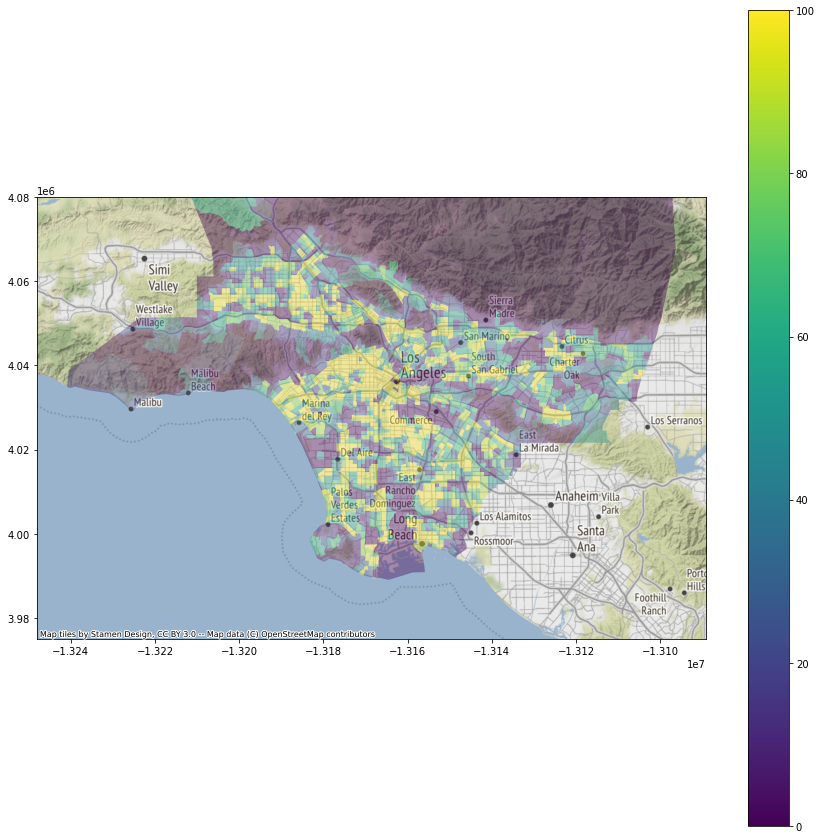

In [44]:


# reproject to web mercator
gdf_web_mercator = HPI_LA.to_crs(epsg=3857)

# map it
fig, ax = plt.subplots(figsize=(15,15))

gdf_web_mercator.plot(ax=ax,figsize=(10,10), column='supermkts', alpha=0.40, legend=True) 

#ax.axis('off')
ax.set_ylim(3975000, 4080000)

ctx.add_basemap(ax)

## AbovePoverty (abovepover)


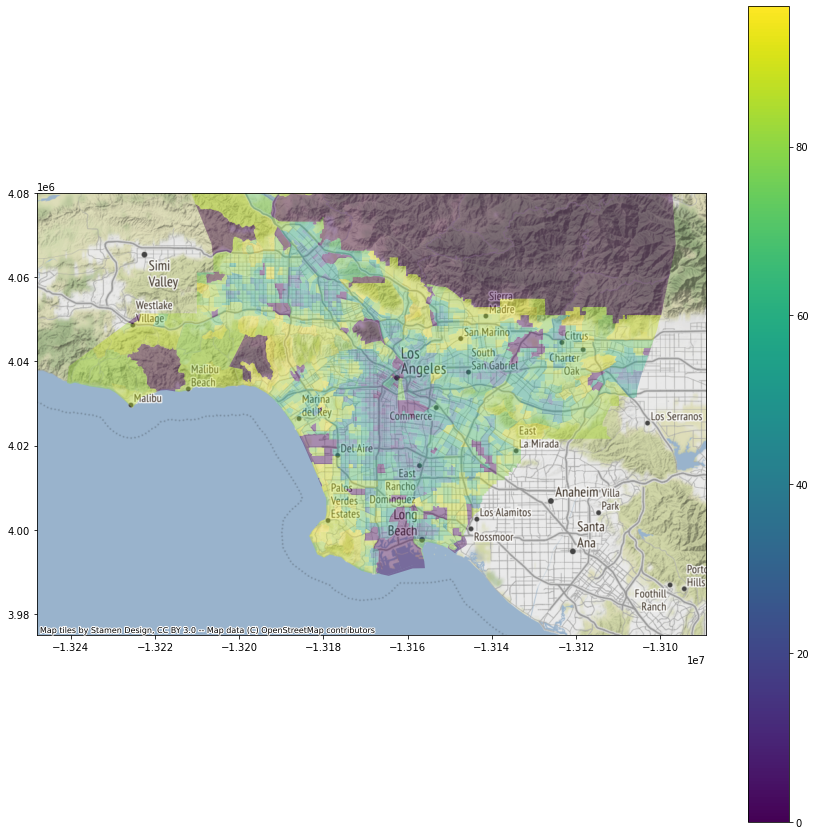

In [45]:

# reproject to web mercator
gdf_web_mercator = HPI_LA.to_crs(epsg=3857)

# map it
fig, ax = plt.subplots(figsize=(15,15))

gdf_web_mercator.plot(ax=ax,figsize=(10,10), column='abovepover', alpha=0.40, legend=True) 

#ax.axis('off')
ax.set_ylim(3975000, 4080000)

ctx.add_basemap(ax)

## Healthcare Access (healthca_1)


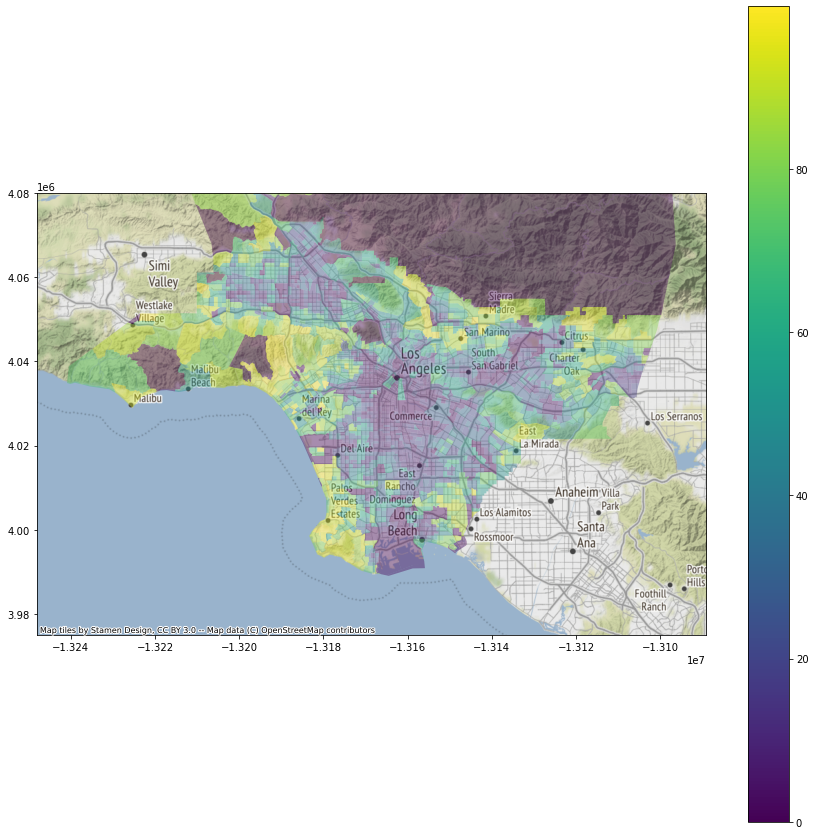

In [46]:
#healthca_1 is healthcare but on percentage form

# reproject to web mercator
gdf_web_mercator = HPI_LA.to_crs(epsg=3857)

# map it
fig, ax = plt.subplots(figsize=(15,15))

gdf_web_mercator.plot(ax=ax,figsize=(10,10), column='healthca_1', alpha=0.40, legend=True) 

#ax.axis('off')
ax.set_ylim(3975000, 4080000)

ctx.add_basemap(ax)

## Income (income_pct)

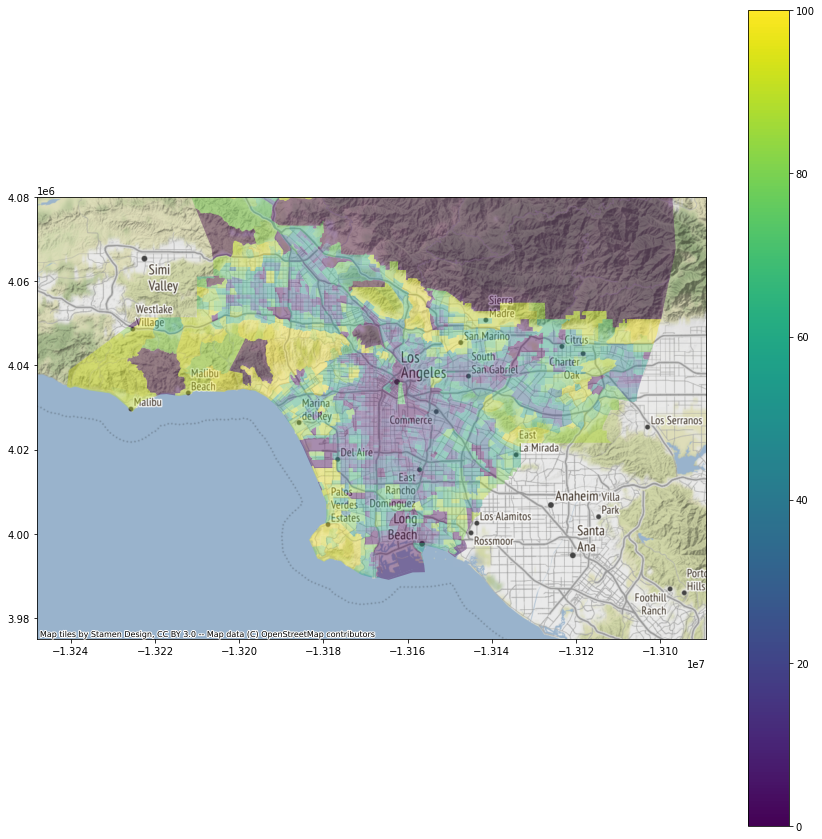

In [47]:


# reproject to web mercator
gdf_web_mercator = HPI_LA.to_crs(epsg=3857)

# map it
fig, ax = plt.subplots(figsize=(15,15))

gdf_web_mercator.plot(ax=ax,figsize=(10,10), column='income_pct', alpha=0.40, legend=True) 

#ax.axis('off')
ax.set_ylim(3975000, 4080000)

ctx.add_basemap(ax)

# Focusing on Inglewood vs Beverly Hills

In [48]:
HPI_Inglewood = HPI[HPI["City"] == "Inglewood"]
HPI_BH = HPI[HPI["City"] == "Beverly Hills"]

In [49]:
HPI_InglewoodBH = pd.concat([HPI_Inglewood, HPI_BH])

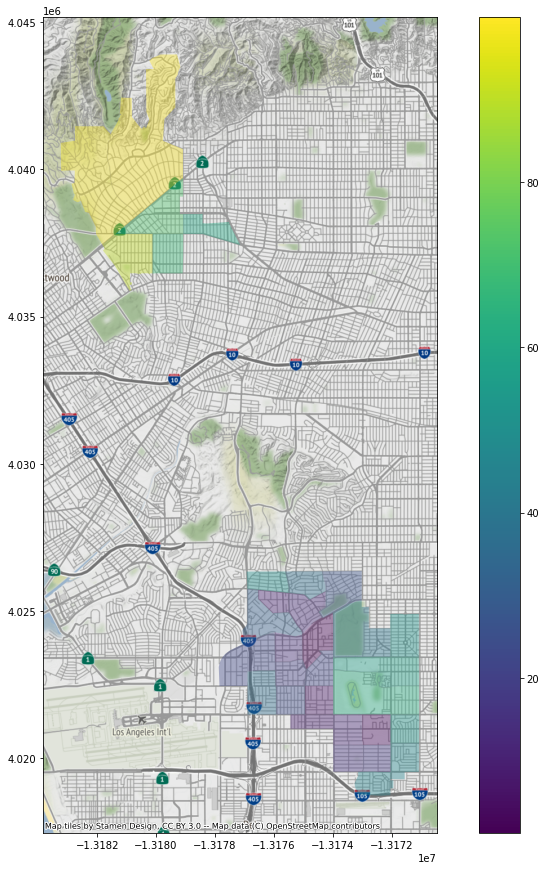

In [50]:
# reproject to web mercator
gdf_web_mercator = HPI_InglewoodBH.to_crs(epsg=3857)

# map it
fig, ax = plt.subplots(figsize=(15,15))

gdf_web_mercator.plot(ax=ax,figsize=(10,10), column='income_pct', alpha=0.40, legend=True) 

#ax.axis('off')

ctx.add_basemap(ax)

# Top 5 HPI

In [51]:
Bottom_10= HPI_LA.tail(10) 
Bottom_10
Desc= Bottom_10.sort_values(by='hpi2score',ascending= False)

fig = px.bar(Desc, #plot
       x='hpi2score',
       y='City',
       orientation='h',
       title='Cities in LA County with the Lowest HPI Score',)
fig.update_layout( #configure the bar chart
    margin= dict(l=0,r=0),
    font=dict(size=10))
fig